# Calculate Saturation



This notebook consists of cells that can be used to compute saturation values from a segmented image stack. 

**Usage**: Click on the play button above and enter the relevant inputs when prompted followed by the enter key.
  
**output**: a csv file containing computed saturation values for each slice is saved in the image folder 



- author: Akin Aroge
- email: arogeakindele@gmail.com
- version: 0.1
- created: 27-04-2022

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


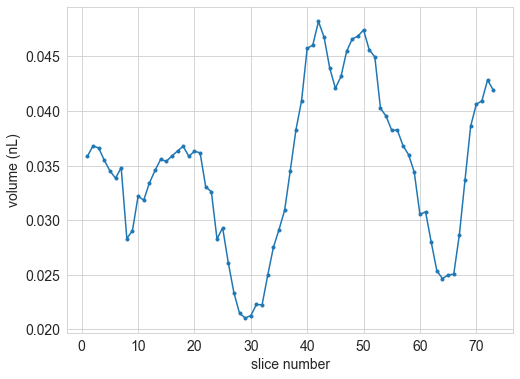

In [1]:
# do not edit
import imaging as ig
import numpy as np
import os
import pandas as pd
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = 8, 6

## Fill in the required inputs

f_dir = str(input('Enter the containing folder of the image:'))
fname = str(input("Enter the file name (including extension, e.g 'image.tiff'):"))
sat_phase_val = int(input('Enter the value of the saturation phase pixels: '))
pixel_size = float((input('Enter pixel size of the image in micron:')))
mea_axis = str(input("Enter the mea axis for saturation. \
                 Enter z for through-plane,\
                 x for across the plane, \
                 y for top to bottom:"))

# f_dir = r'C:\Users\Yadvinder\Documents\Akin-Aroge\code\sample-files'
# fname = r'sample-rois-file.tif'
# #im_path = r'C:\Users\Yadvinder\Documents\Akin-Aroge\code\sample-files\sample-rois-file.tif'
# result_dir = r'C:\Users\Yadvinder\Documents\Akin-Aroge\code\sample-files'
# air_phase_val = 0
# water_phase_val = 2
# pixel_size = 1.54
# mea_axis = 'z'

# im_file_dir = r'C:\Users\Aroge\Documents\Projects\NXCT\sample-files'
# im_file_name = r'small-sample-rois-1.tif'
# #im_path = r'C:\Users\Yadvinder\Documents\Akin-Aroge\code\sample-files\sample-rois-file.tif'
# result_dir = r'C:\Users\Aroge\Documents\Projects\NXCT\sample-files\psd.csv'
# pore_phase_val = 0
# # water_phase_val = 2
# pixel_size = 1.54

im_path = os.path.join(f_dir, fname)
im = imread(os.path.normpath(im_path))
vol_conv = (pixel_size**3)*1e-6
vol = ig.analysis.get_phase_vol(im=im, phase_val=sat_phase_val, ax=mea_axis)
vol = vol * vol_conv


slice_num = np.arange(len(vol))+1
slice_position = slice_num*pixel_size
# save data
data = pd.DataFrame({'slice-number':slice_num,
            'vol': vol})

result_fname = 'volume-data.csv'

data.to_csv(os.path.join(f_dir, result_fname), index=False)

# plot
fig, ax = plt.subplots()
ax.plot(slice_num, vol, '.-')
ax.set_ylabel('volume (nL)');
ax.set_xlabel('slice number');